In [82]:
# R2 sequence is a quasi random sequence which generates points that are
# evenly spaced in the unit square

# https://extremelearning.com.au/unreasonable-effectiveness-of-quasirandom-sequences/

# generate an R2 sequence
def r2_sequence(num):
    # R2 sequence
    points = []
    g = 1.32471795724474602596
    a1 = 1.0/g
    a2 = 1.0/(g*g)
    for n in range(0,num):
        x = (0.5+a1*n)
        y = (0.5+a2*n)
        points.append((x%1,y%1))
    return points

### Interpolating Triangle Given Number of Points

In [83]:
import numpy as np

# https://extremelearning.com.au/evenly-distributing-points-in-a-triangle/

# generates points in a triangle using paralleogram method applied to R2 sequence
def interpolate_triangle(A, B, C, num_points):
    # vectors of triangle
    AC = C - A
    AB = B - A
    
    # generate r1 and r2
    sequence = r2_sequence(num_points)
    
    # parallelogram method.....
    points = np.zeros((num_points,3))
    # generate point in paralleogram using r1 and r2 from R2 sequence
    for i in range(num_points):
        r1,r2 = sequence[i]
        if (r1+r2) < 1:
            points[i]= (r1 * AC) + (r2 * AB)
        else:
            points[i] = (1-r1) * AC + (1-r2) * AB
    return points
   

# Example usage
pt1 = np.array([0, 0, 0])
pt2 = np.array([2, 0, 0])
pt3 = np.array([1, 1, 0])
num_points = 1000
interpolated_pts = interpolate_triangle(pt1, pt2, pt3, num_points)

print("Interpolated Points:")
print(interpolated_pts)

Interpolated Points:
[[1.5        0.5        0.        ]
 [0.39455825 0.25487767 0.        ]
 [1.2891165  0.00975533 0.        ]
 ...
 [1.3745735  0.11303325 0.        ]
 [1.73086825 0.13208909 0.        ]
 [0.83631001 0.37721142 0.        ]]


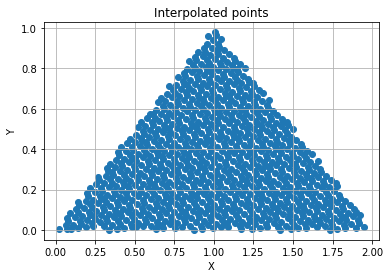

In [84]:
import matplotlib.pyplot as plt
x_coords = interpolated_pts[:, 0]
y_coords = interpolated_pts[:, 1]

plt.scatter(x_coords, y_coords)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Interpolated points')
plt.grid(True)
plt.show()

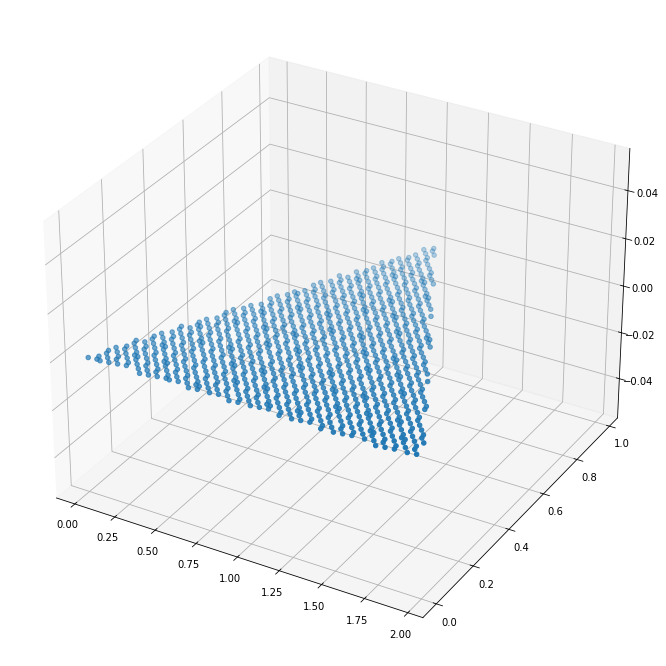

In [85]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_coords = interpolated_pts[:, 0]
y_coords = interpolated_pts[:, 1]
z_coords = interpolated_pts[:, 2]


ax.scatter(x_coords, y_coords, z_coords)
plt.show()

### Interpolating Triangle Given Density Value

In [86]:
# generate points using density instead of count

# generates points in a triangle using paralleogram method and pt density
def interpolate_triangle(A, B, C, density):
    # vectors of triangle
    AC = C - A
    AB = B - A
    
    # get area of triangle
    cross_product = np.cross(AC, AB)
    area = 0.5 * np.linalg.norm(cross_product)
    
    # calculate number of points needed
    num_points = int(density * area)
    print(str(num_points) + " points generated")
    
    # generate r1 and r2
    sequence = r2_sequence(num_points)
    
    # parallelogram method.....
    points = np.zeros((num_points,3))
    # generate point in paralleogram using r1 and r2 from R2 sequence
    for i in range(num_points):
        r1,r2 = sequence[i]
        if (r1+r2) < 1:
            points[i]= (r1 * AC) + (r2 * AB)
        else:
            points[i] = (1-r1) * AC + (1-r2) * AB
    return points
   

# Example usage
pt1 = np.array([0, 0, 0])
pt2 = np.array([4, 0, 1])
pt3 = np.array([1, 0, 0])

# density is pts per unit of area
density = 200
interpolated_pts = interpolate_triangle(pt1, pt2, pt3, density)

100 points generated


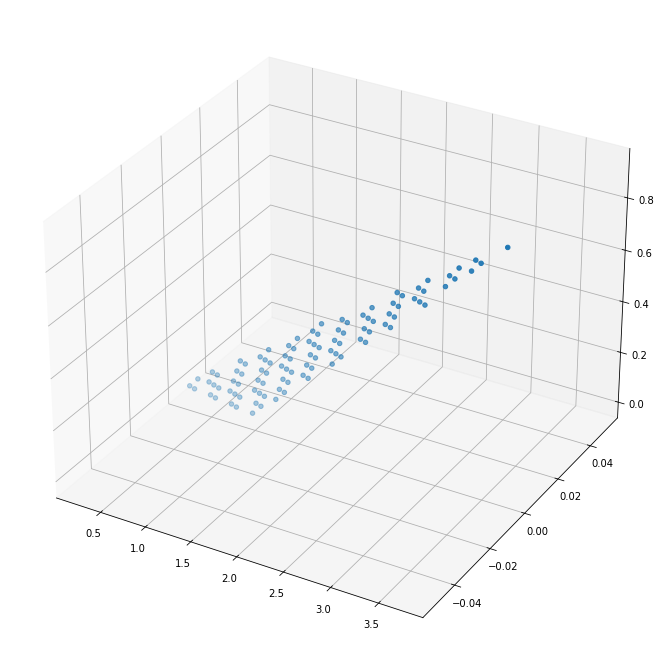

In [87]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

x_coords = interpolated_pts[:, 0]
y_coords = interpolated_pts[:, 1]
z_coords = interpolated_pts[:, 2]


ax.scatter(x_coords, y_coords, z_coords)
plt.show()